In [1]:
%load_ext tikzmagic
%matplotlib inline

# 카테고리분포와 다항분포

## 카테고리분포

카테고리분포는 베르누이분포의 확장판이다. 베르누이분포는 두 가지의 값만 가질 수 있지만 카테고리분포는 $1,2,\ldots,K$까지 $K$($K>0$)개의 값을 가질 수 있다. 예를 들어 주사위를 던져 나오는 숫자는 $K=6$인 카테고리분포를 따른다고 할 수 있다. 

확률변수 $x$가 카테고리분포를 따르는 경우 다음과 같이 표시한다.

$$ x \sim \text{Cat}(x) $$

위 식에서 $\text{Cat}(x)$은 카테고리분포의 확률질량함수를 가리키는 기호다.

### 카테고리분포의 확률분포함수

카테고리분포의 확률질량함수 $\text{Cat}(x)$의 수식은 다음과 같다.

$$
\begin{split}
\begin{align}
\text{Cat}(x;\mu_1,\mu_2,\ldots,\mu_K) = 
\begin{cases} 
\mu_1 & \text{if }x=1, \\
\mu_2 & \text{if }x=2, \\
\vdots & \vdots \\
\mu_K & \text{if }x=K, \\
\end{cases}
\end{align}
\end{split}
$$

카테고리분포는 각각 $1,2,\ldots,K$값이 나올 확률을 나타내는 $\mu_1,\mu_2,\ldots,\mu_K$라는 $K$개의 모수를 가진다. 예를 들어 공정한 주사위의 경우에는 모든 모수값이 $\frac{1}{6}$이 된다.

$$ \text{공정한 주사위의 카테고리모수}: \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 = \mu_6 = \dfrac{1}{6} $$

어떤 경우에도 $\mu_1,\mu_2,\ldots,\mu_K$를 모두 더하면 1이 되어야 한다. 이 제한조건을 수식으로 표현하면 다음과 같다.

$$ \sum_{i=1}^{K}\mu_i = 1 $$

카테고리분포의 확률질량함수 $\text{Cat}(x)$도 베르누이분포처럼 하나의 수식으로 표현하는 방법이 있는데 이렇게 하려면 카테고리분포가 생성하는 값이 $1,2,\ldots,K$와 같은 정수값이 아니라 다음과 같이 0과 1로 이루어진 벡터값

$$ x = (x_1, x_2, \ldots, x_K) $$

으로 풀어써야 한다. 예를 들어 주사위와 같이 $K=6$인 카테고리분포는 다음과 같은 값을 가진다고 가정한다.

\begin{split} 
\begin{align}
\begin{aligned}
x = 1  \;\; & \rightarrow & \;\; x = (1, 0, 0, 0, 0, 0) \\
x = 2  \;\; & \rightarrow & \;\; x = (0, 1, 0, 0, 0, 0) \\
x = 3  \;\; & \rightarrow & \;\; x = (0, 0, 1, 0, 0, 0) \\
x = 4  \;\; & \rightarrow & \;\; x = (0, 0, 0, 1, 0, 0) \\
x = 5  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 1, 0) \\
x = 6  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 0, 1) \\
\end{aligned}
\end{align}
\end{split}

이렇게 정수 범주값을 0과 1로 이루어진 벡터값으로 바꾸는 작업을 <b>원핫인코딩(one-hot encoding)</b>이라고 한다. 원핫인코딩을 하게되면 카테고리분포의 확률질량함수 $\text{Cat}$은 다음과 같이 표시한다. 

$$ \text{Cat}(x_1, x_2, \dots, x_K;\mu_1, \dots, \mu_K) $$

이렇게 원핫인코딩을 한 경우에는 카테고리분포의 확률질량함수를 다음과 같은 간단한 수식으로 표현할 수 있다.

$$ \text{Cat}(x_1, x_2, \dots, x_K;\mu_1, \dots, \mu_K) = \mu_1^{x_1} \mu_2^{x_2}  \cdots \mu_K^{x_K}  =  \prod_{k=1}^K \mu_k^{x_k} $$

### 카테고리분포의 시뮬레이션

scipy 패키지의 stats 서브패키지는 카테고리분포를 시뮬레이션할 수 있는 별도의 클래스를 제공하지 않지만 다음에 설명할 다항분포를 시뮬레이션할 수 있는 클래스 `multinomial`를 제공한다. 이 클래스에서 인수 `n`을 1로 설정하면 카테고리분포를 시뮬레이션할 수 있다. 

예를 들어 공정한 주사위의 눈금을 나타내는 카테고리분포를 시뮬레이션해보자. 이 카테고리분포의 모수는 다음과 같다. 

$$K=6$$

$$ \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 = \mu_6 = \dfrac{1}{6} $$

In [6]:
from scipy.stats import multinomial

K = 6
mu = np.ones(K) / float(K)
x = multinomial(n=1, p=mu)
x

`multinomial` 클래스의 `pmf` 메소드는 확률질량함수를 계산한다. 다만 확률질량함수의 입력값으로는 원핫인코딩된 값을 넣어야 하므로 pandas 패키지의 `get_dummies` 함수를 사용하여 원핫인코딩을 해준다.

In [8]:
xx = np.arange(K)
xx

array([0, 1, 2, 3, 4, 5])

In [9]:
import pandas as pd

xx_ohe = pd.get_dummies(xx)
xx_ohe

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [12]:
pmf = x.pmf(xx_ohe.values)
pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

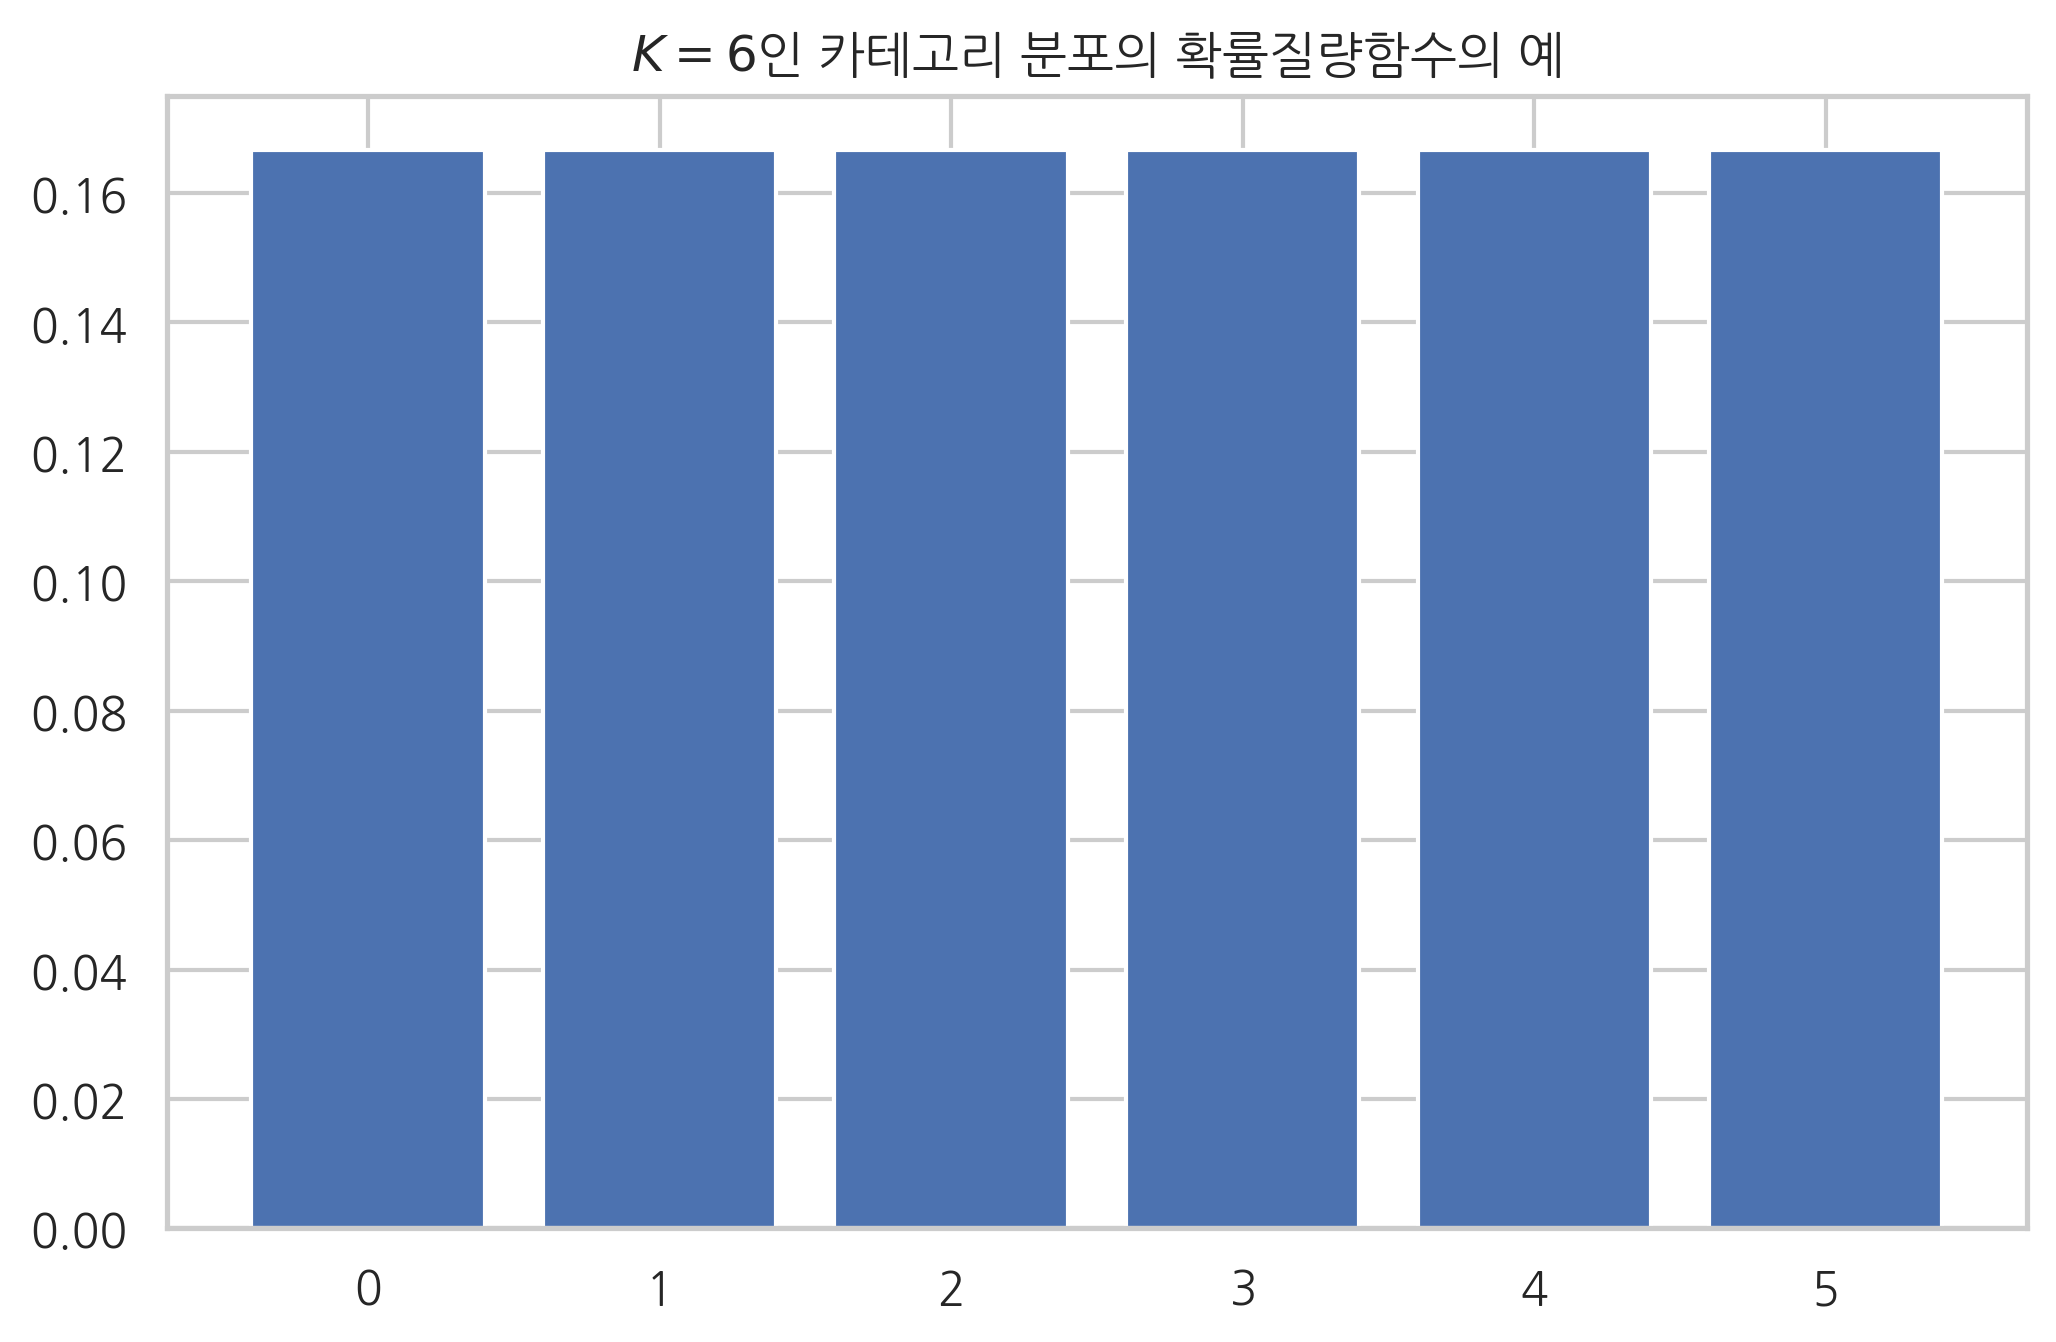

In [14]:
plt.bar(xx, pmf)
plt.title("$K=6$인 카테고리 분포의 확률질량함수의 예")
plt.show()

## 카테고리분포의 예

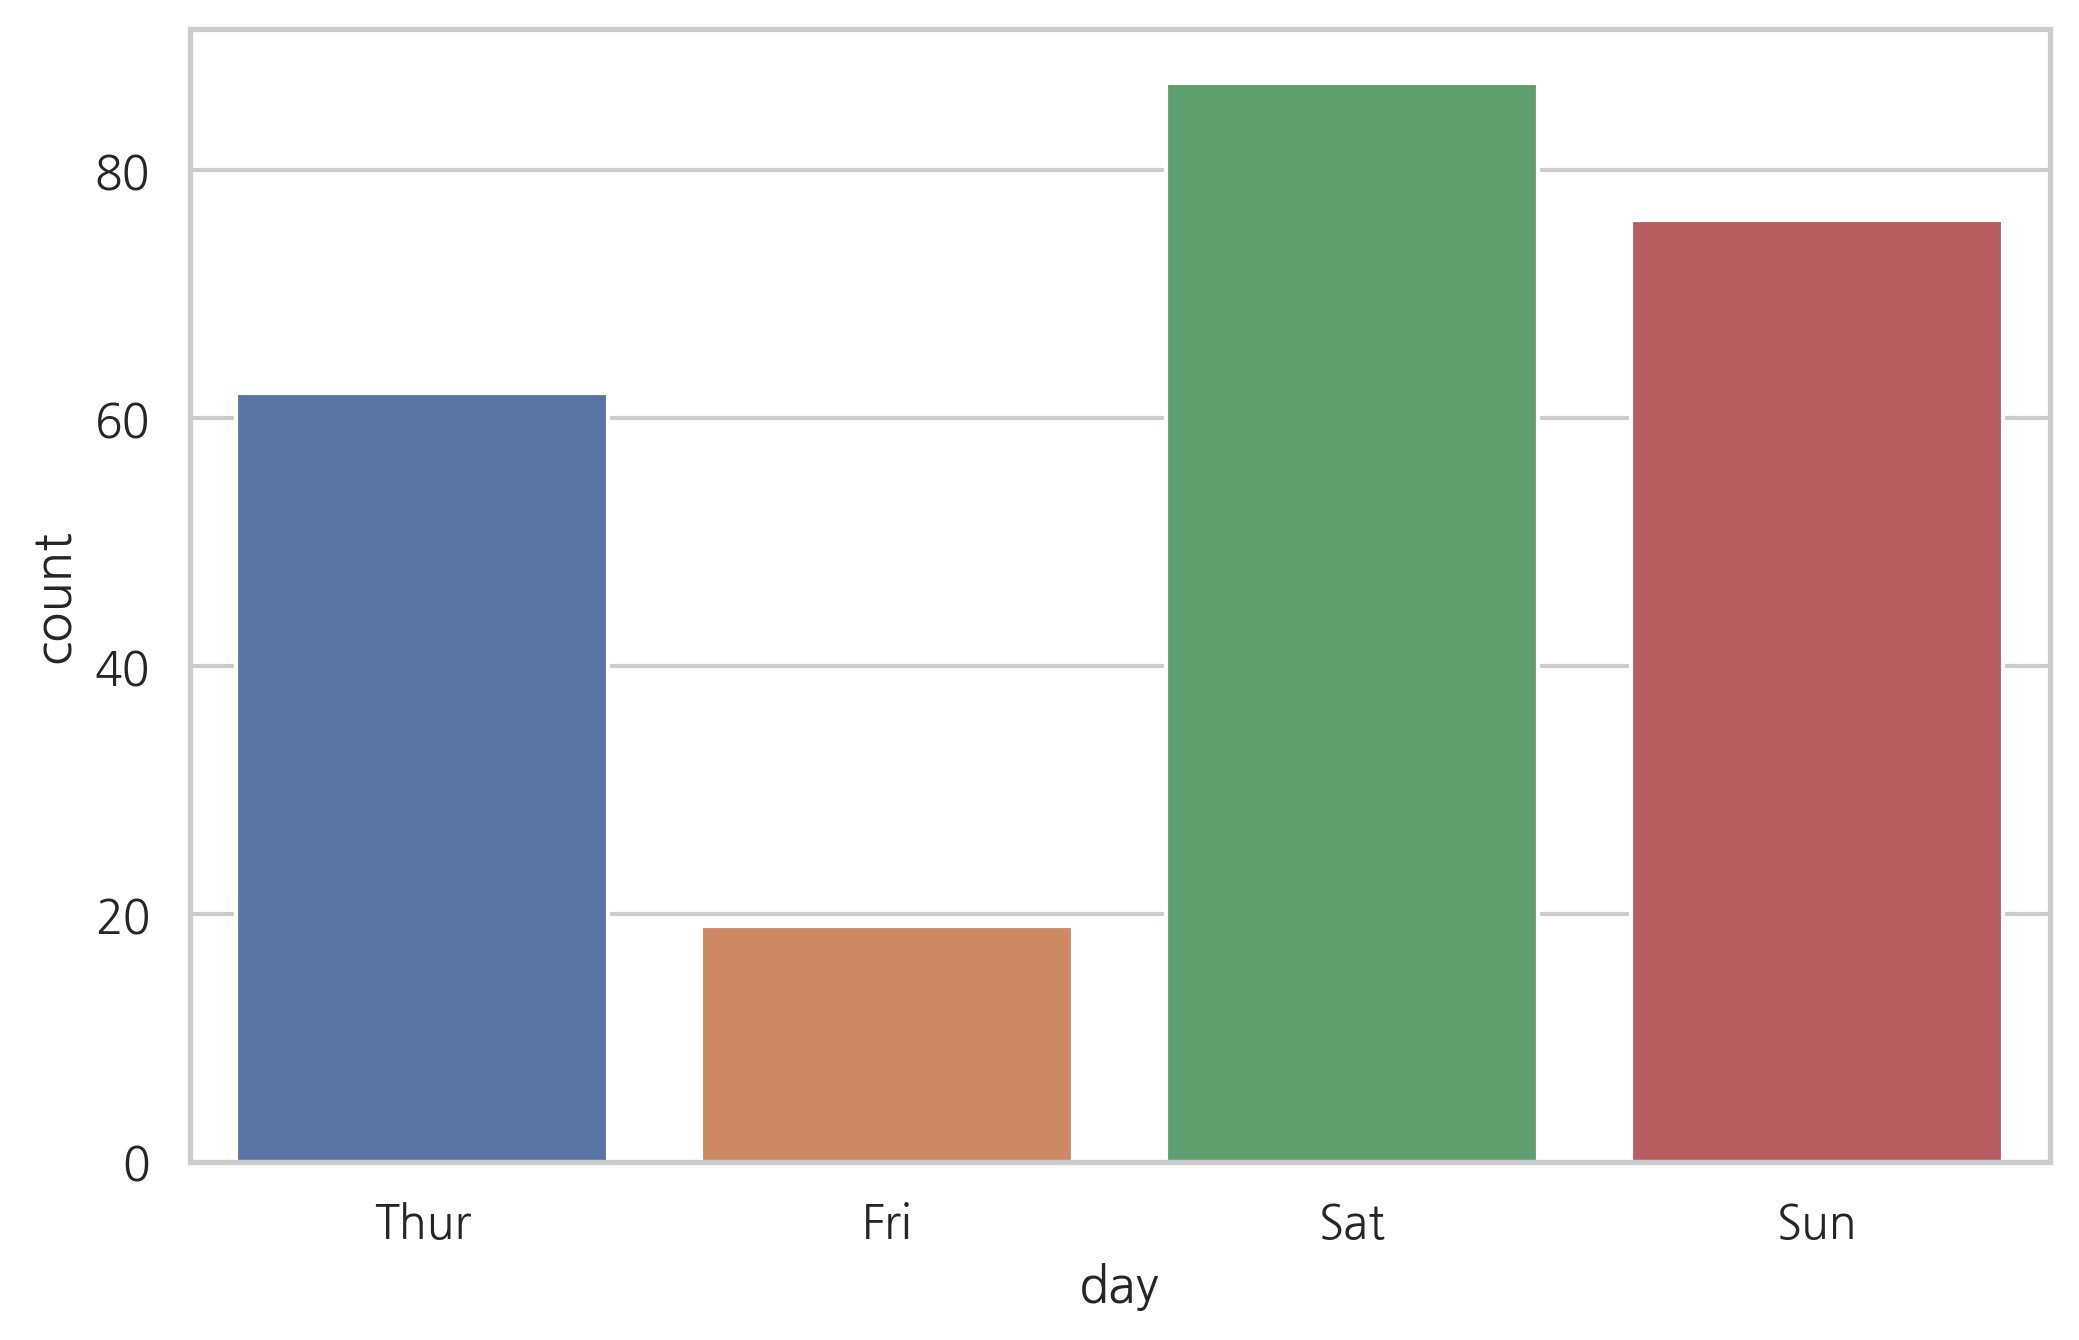

In [17]:
tips = sns.load_dataset("tips")

sns.countplot(x="day", data=tips)
plt.show()